In [2]:
install.packages('see')

Installing package into ‘/home/marius/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘performance’, ‘bayestestR’, ‘datawizard’, ‘effectsize’, ‘ggplot2’, ‘insight’, ‘parameters’




In [160]:

# Load packages -----------------------------------------------------------
library(BayesFactor) # needed to calculate Bayes factors
library(here) # needed to assign working directory for relative paths
library(tidyverse) # needed for importing, processing, and plotting data
library(ggplot2)
library(ggtext)
library(ggpubr)
library(brms)
library(hash)
library(magrittr)
library(reshape2)
library(stringr)
library(dplyr)
library(purrr)
library(forcats)
library(tidyr)
library(modelr)
library(ggdist)
library(tidybayes)
library(cowplot)
library(rstan)
library(ggrepel)
library(RColorBrewer)
library(posterior)
library(svglite)
library(see)
library(ggpubr)

# Activation data

## Load data

In [367]:
# load and prepare data
# activations_df <- read.csv(file = "/Users/mariusgorner/ownCloud/PhD/projects/scientific/gaze-motion/results/mixed_models/data_tables/gm-dat_fwhm-5_z-scores.csv", sep='\t')
activations_df <- read.csv(file = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/data/pilot/beta_values/gm-dat_fwhm-5_z-scores_newROIs.csv", sep='\t')

activations_df$participant = factor(activations_df$participant)
activations_df$subject_type = factor(activations_df$subject_type)
activations_df$roi = factor(activations_df$roi)
activations_df$hemisphere = factor(activations_df$hemisphere)
activations_df$condition = factor(activations_df$condition)
activations_df$type_of_y = factor(activations_df$type_of_y)


activations_df <- activations_df %>% discard(~all(is.na(.) | . ==""))


In [371]:
activations_df

participant,subject_type,task,run,roi,hemisphere,condition,y,type_of_y
<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<fct>
sub-00,pilot,gc,run-001,GFP,LH,Gaze,-1.21211491,beta_z-score
sub-00,pilot,gc,run-001,GFP,RH,Gaze,3.86039374,beta_z-score
sub-00,pilot,gc,run-001,fMotionArea,LH,Gaze,1.26630388,beta_z-score
sub-00,pilot,gc,run-001,fMotionArea,RH,Gaze,2.65328134,beta_z-score
sub-00,pilot,gc,run-001,Marquardt2017GFP,LH,Gaze,0.30278289,beta_z-score
sub-00,pilot,gc,run-001,Marquardt2017GFP,RH,Gaze,1.44977668,beta_z-score
sub-00,pilot,gc,run-001,GFP,LH,Cubes,0.67338350,beta_z-score
sub-00,pilot,gc,run-001,GFP,RH,Cubes,3.79211670,beta_z-score
sub-00,pilot,gc,run-001,fMotionArea,LH,Cubes,2.00931825,beta_z-score


In [ ]:
p <- cc + soa + (cc|run) (soa|run)

## Plot

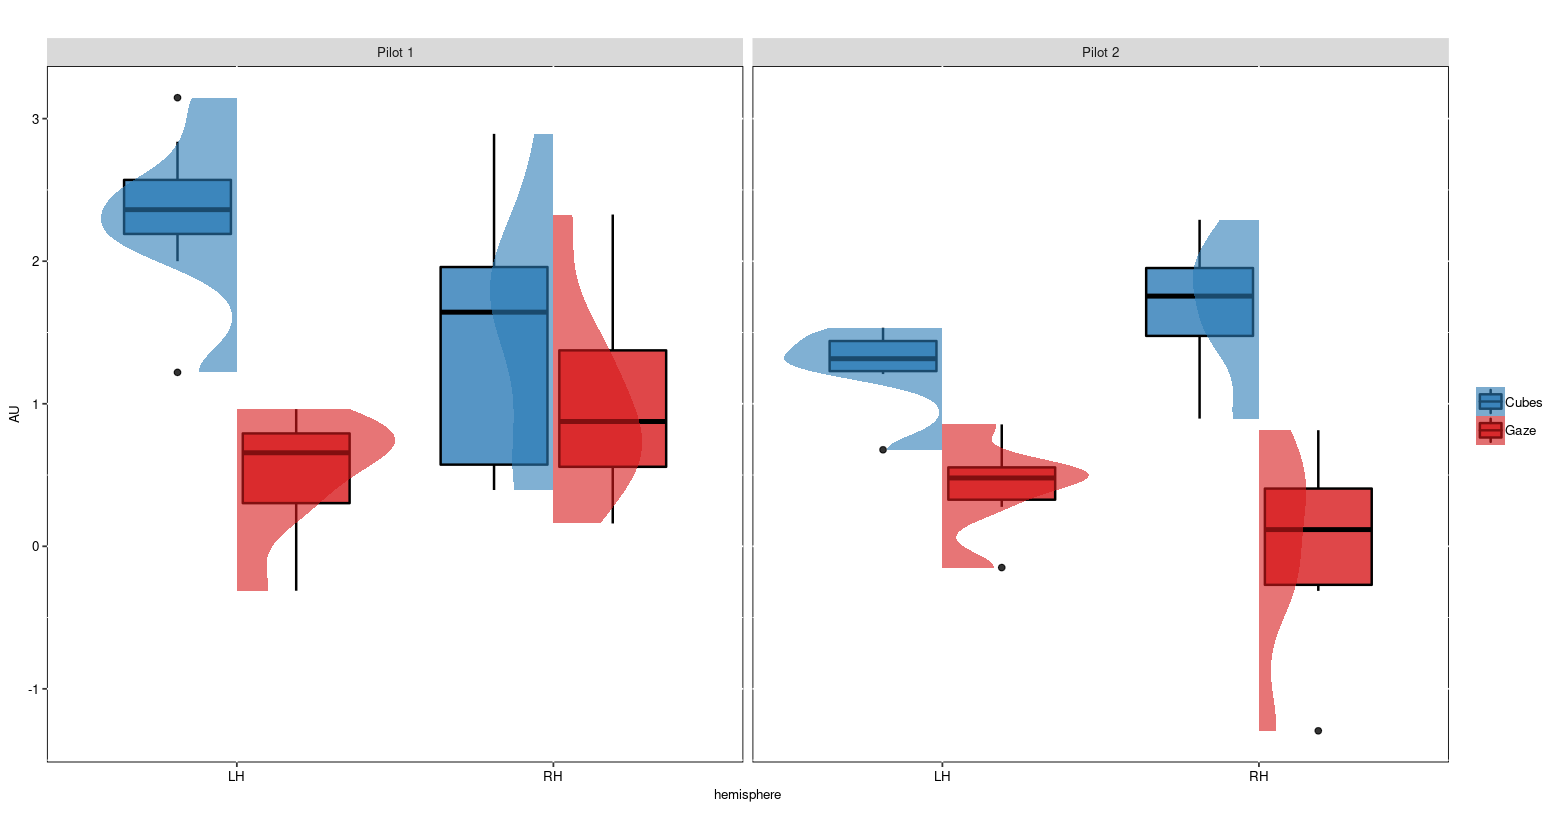

In [370]:
out_path <- "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/activations"

roi_ <- c("Marquardt2017GFP")
cons_ <- c("Gaze", "Cubes")
# hemisphere_ <- 'LH'

filtered_data = filter(
                activations_df, 
                subject_type == 'pilot' &
                task %in% c('gc', 'gic') &
                condition %in%  cons_ &
                roi %in% roi_  
                # hemisphere %in% c(hemisphere_)
)

options(repr.plot.width=13, repr.plot.height=7)


p1 <- ggplot(filtered_data, aes(x = hemisphere, y = y, col=condition)) + 
geom_boxplot(aes(fill = condition), alpha = .8, colour="black", size=0.7) +
scale_fill_manual(labels = c("Cubes", "Gaze"), values=c("#2c7bb6", "#d7191c")) + 
geom_violinhalf(aes(x = hemisphere, fill = condition), colour="white", flip = c(1, 3), width=1, alpha=0.6, position="identity", size=0) +
scale_colour_manual(labels = c("cubes", "gaze"), values=c("#2c7bb6", "#d7191c")) + 
ylab("AU") +
theme(
        aspect.ratio = 1,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8),
        strip.text = element_text(size = 8, hjust = 0.5, 
                              vjust = 0.5),
        legend.title=element_text(size=0),
        legend.text=element_text(size=8)
        ) +

facet_wrap(~ participant, labeller=as_labeller(c("sub-00"="Pilot 1", "sub-0000"="Pilot 2")))

p1
ggsave(
    paste(out_path, 'results_.pdf', sep='/'),
    p1,
    scale = 1,
    width = 10,
    height = 5,
    units = "cm",
    # dpi = 300
    device = cairo_pdf
)

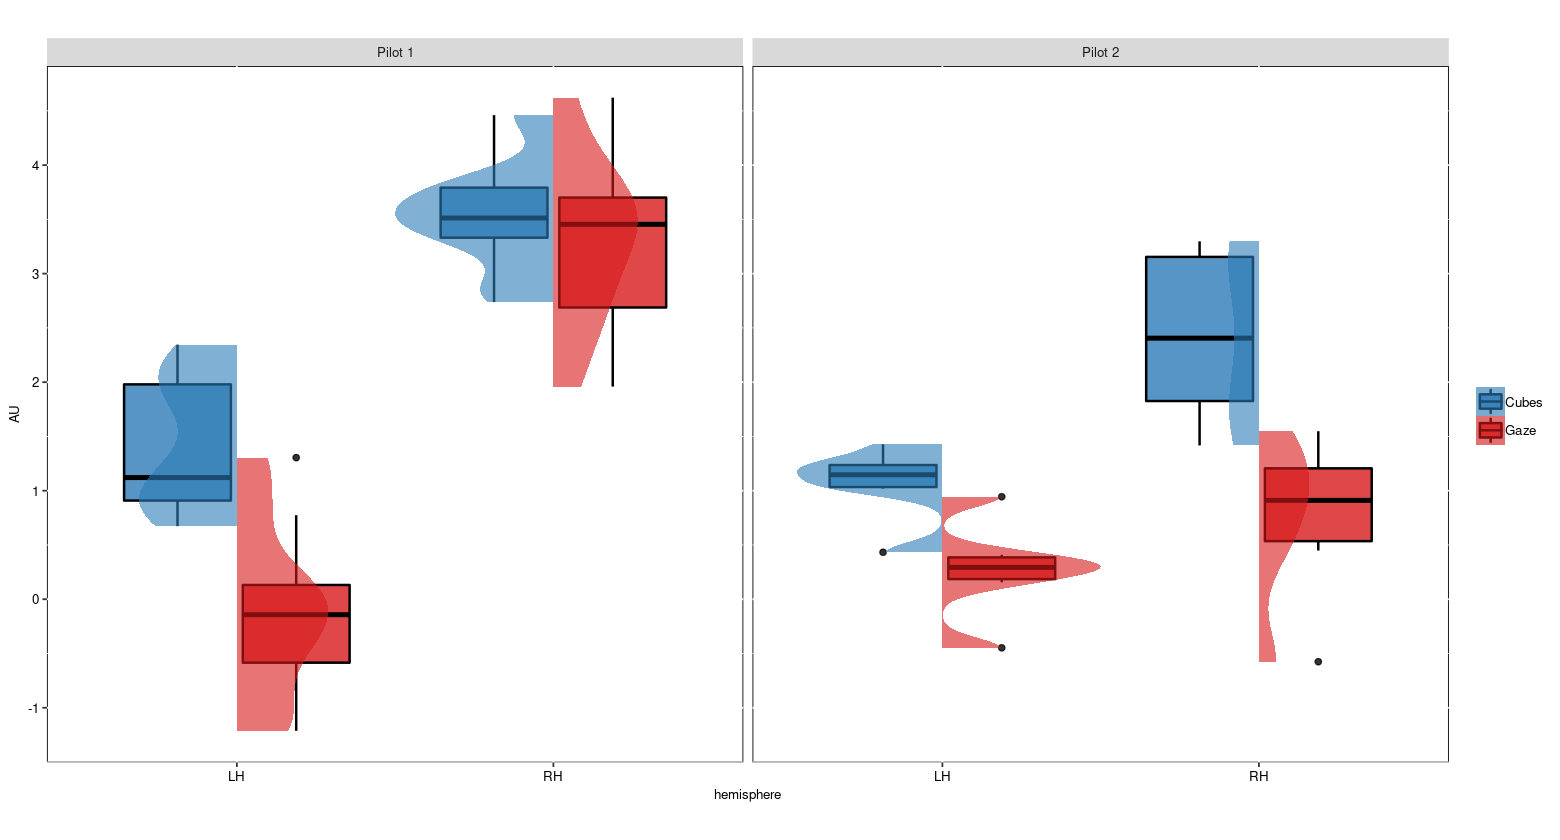

In [368]:
out_path <- "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/activations"

roi_ <- c("GFP")
cons_ <- c("Gaze", "Cubes")
# hemisphere_ <- 'LH'

filtered_data = filter(
                activations_df, 
                subject_type == 'pilot' &
                task %in% c('gc', 'gic') &
                condition %in%  cons_ &
                roi %in% roi_  
                # hemisphere %in% c(hemisphere_)
)

options(repr.plot.width=13, repr.plot.height=7)


p1 <- ggplot(filtered_data, aes(x = hemisphere, y = y, col=condition)) + 
geom_boxplot(aes(fill = condition), alpha = .8, colour="black", size=0.7) +
scale_fill_manual(labels = c("Cubes", "Gaze"), values=c("#2c7bb6", "#d7191c")) + 
geom_violinhalf(aes(x = hemisphere, fill = condition), colour="white", flip = c(1, 3), width=1, alpha=0.6, position="identity", size=0) +
scale_colour_manual(labels = c("cubes", "gaze"), values=c("#2c7bb6", "#d7191c")) + 
ylab("AU") +
theme(
        aspect.ratio = 1,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8),
        strip.text = element_text(size = 8, hjust = 0.5, 
                              vjust = 0.5),
        legend.title=element_text(size=0),
        legend.text=element_text(size=8)
        ) +

facet_wrap(~ participant, labeller=as_labeller(c("sub-00"="Pilot 1", "sub-0000"="Pilot 2")))

p1
ggsave(
    paste(out_path, 'results_.pdf', sep='/'),
    p1,
    scale = 1,
    width = 10,
    height = 5,
    units = "cm",
    # dpi = 300
    device = cairo_pdf
)

## Differences between conditions grouped by hemisphere

### specify null-hypotheses

In [337]:
hyps_hash = hash()


tasks <- I(list(c('gic', 'gc')))
condition_1 <- c('Gaze')
condition_2 <- c('Cubes')
hyps <- c(
    'conditionGaze = 0')
names <- c(
    'gic-gc_Gaze-Cubes')
non_intercept_con <- c(
    'b_conditionGaze'
)
hyps_hash[['GFP']] = data.frame(tasks, condition_1, condition_2, hyps, names, non_intercept_con)




In [54]:
hyps_hash

<hash> containing 1 key-value pair(s).
  gGFP : gic, gc Gaze Cubes conditionGaze = 0 gic-gc_Gaze-Cubes b_conditionGaze

### specify model

In [338]:
mf_ <- bf(
    y ~ condition + (condition|run)
    # y ~ condition + (condition|run:participant) + (condition|participant)#  
)
get_prior(mf_,  data = activations_df)



prior,class,coef,group,resp,dpar,nlpar,bound,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,default
,b,conditionGaze,,,,,,default
,b,conditionIris,,,,,,default
lkj(1),cor,,,,,,,default
,cor,,run,,,,,default
"student_t(3, 0.4, 2.5)",Intercept,,,,,,,default
"student_t(3, 0, 2.5)",sd,,,,,,,default
,sd,,run,,,,,default
,sd,conditionGaze,run,,,,,default


### Run analysis

In [339]:

load_fitted_models = FALSE

out_path = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/activations/fwhm-5_run"
dir.create(out_path, showWarnings = FALSE)

for (roi_ in c('GFP')){
    
    print(roi_)
    dir.create(file.path(out_path, roi_), showWarnings = FALSE)
    
    hyps_df = hyps_hash[[roi_]]
    
    for (hemi_ in c('LH', 'RH')){

        for(i in 1:nrow(hyps_df)) {       # for-loop over rows
        # for (hyp_ in hyp_hash){

            filtered_data = filter(
                activations_df, 
                subject_type == 'pilot' &
                task %in% hyps_df[i, 1][[1]] &
                condition %in% c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]) & 
                roi == roi_ & 
                hemisphere %in% c(hemi_))
            
            print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))

            if (dim(filtered_data)[1] != 0) {

                ### check if fitted model exists and can be loaded
                file_type = ".rds"
                fp_model = file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                
                if(load_fitted_models & file.exists(fp_model)) {
                    m <- readRDS(fp_model)
                } else {
                

                    ## truncated priors:  effect only
                    priors_ = c(
                        set_prior('normal(0, 10)', class='b', lb=-5, ub=5)
                    )
 

                    #
                    capture.output({
                        m = brm(
                            mf_, 
                            data = filtered_data, 
                            prior = priors_,
                            sample_prior = TRUE, 
                            family = gaussian(link="identity"),
                            chains = 4,
                            # iter = 1,
                            cores = 4,
                            save_pars = save_pars(all=TRUE),
                            control = list(adapt_delta = 0.9, max_treedepth = 20))
                        }, 
                    file="rstan.modelfit.output")

                    ### store results                
                    file_type = ".rds"
                    saveRDS(m, fp_model)
                    
                }

                file_type = "_summary.txt"
                s <- summary(m)
                capture.output(s, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )

                file_type = "_conditional-effects.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 3, # The width of the plot in inches
                    height = 3
                    )
                plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
                dev.off()

                
                file_type = "_posterior_draws.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                print(m %>%
                    gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
                    mutate() %>%
                    ggplot(aes(x = .variable, y = .value)) +
                    stat_halfeye(size=0.01))
                dev.off()

                
                hyp <- hyps_df[i, 4][[1]]
                hyp <- hypothesis(m, hyp)
                file_type = "_hypothesis-test_BF.txt"
                capture.output(hyp[1], file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                file_type = "_posterior-probability.txt"
                pp_ = colMeans(hyp$samples > 0)
                capture.output(pp_, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                
                file_type = "_hypothesis-test_prior-posterior.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                plot(hyp, chars = NULL)
                dev.off()
                
                #
                file_type = "_pairs.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 15, # The width of the plot in inches
                    height = 10
                    )
                plot(pairs(m))
                dev.off()
                
            }else {
                
                print("*** NOT DATA FOUND FOR...")
                print(hyps_df[i, 1][[1]])
                print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))
                print(roi_)
                print(c(hemi_))
                
            }
        }
    }    
}

[1] "GFP"
[1] "Gaze"  "Cubes"


Compiling Stan program...

Start sampling



[1] "Gaze"  "Cubes"


Compiling Stan program...

Start sampling



## Differences between hemispheres grouped by condition

### specify null-hypothese

In [348]:
hyps_hash = hash()


tasks <- I(list(c('gic', 'gc')))
condition_1 <- c('LH')
condition_2 <- c('RH')
hyps <- c(
    'hemisphereRH = 0')
names <- c(
    'gic-gc_LH-RH')
non_intercept_con <- c(
    'b_hemisphereRH'
)
hyps_hash[['GFP']] = data.frame(tasks, condition_1, condition_2, hyps, names, non_intercept_con)




### specify model

In [349]:
mf_ <- bf(
    y ~ hemisphere + (hemisphere|run)
    # y ~ condition + (condition|run:participant) + (condition|participant)#  
)
get_prior(mf_,  data = activations_df)



prior,class,coef,group,resp,dpar,nlpar,bound,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,default
,b,hemisphereRH,,,,,,default
lkj(1),cor,,,,,,,default
,cor,,run,,,,,default
"student_t(3, 0.4, 2.5)",Intercept,,,,,,,default
"student_t(3, 0, 2.5)",sd,,,,,,,default
,sd,,run,,,,,default
,sd,hemisphereRH,run,,,,,default
,sd,Intercept,run,,,,,default


### Run analysis

In [350]:

load_fitted_models = FALSE

out_path = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/activations/fwhm-5_run"
dir.create(out_path, showWarnings = FALSE)

for (roi_ in c('GFP')){
    
    print(roi_)
    dir.create(file.path(out_path, roi_), showWarnings = FALSE)
    
    hyps_df = hyps_hash[[roi_]]
    
    for (con_ in c('Cubes', 'Gaze')){

        for(i in 1:nrow(hyps_df)) {       # for-loop over rows
        # for (hyp_ in hyp_hash){

            filtered_data = filter(
                activations_df, 
                subject_type == 'pilot' &
                task %in% hyps_df[i, 1][[1]] &
                condition == con_ & 
                roi == roi_)
            
            print(con_)
            print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))

            if (dim(filtered_data)[1] != 0) {

                ### check if fitted model exists and can be loaded
                file_type = ".rds"
                fp_model = file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                
                if(load_fitted_models & file.exists(fp_model)) {
                    m <- readRDS(fp_model)
                } else {

                    ## truncated priors:  effect only
                    priors_ = c(
                        set_prior('normal(0, 10)', class='b', lb=-5, ub=5)
                    )

                    #
                    capture.output({
                        m = brm(
                            mf_, 
                            data = filtered_data, 
                            prior = priors_,
                            sample_prior = TRUE, 
                            family = gaussian(link="identity"),
                            chains = 4,
                            # iter = 1,
                            cores = 4,
                            save_pars = save_pars(all=TRUE),
                            control = list(adapt_delta = 0.9, max_treedepth = 20))
                        }, 
                    file="rstan.modelfit.output")

                    ### store results                
                    file_type = ".rds"
                    saveRDS(m, fp_model)
                    
                }

                file_type = "_summary.txt"
                s <- summary(m)
                capture.output(s, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )

                file_type = "_conditional-effects.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 3, # The width of the plot in inches
                    height = 3
                    )
                plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
                dev.off()

                
                file_type = "_posterior_draws.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                print(m %>%
                    gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
                    mutate() %>%
                    ggplot(aes(x = .variable, y = .value)) +
                    stat_halfeye(size=0.01))
                dev.off()

                
                hyp <- hyps_df[i, 4][[1]]
                hyp <- hypothesis(m, hyp)
                file_type = "_hypothesis-test_BF.txt"
                capture.output(hyp[1], file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                file_type = "_posterior-probability.txt"
                pp_ = colMeans(hyp$samples > 0)
                capture.output(pp_, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                
                file_type = "_hypothesis-test_prior-posterior.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                plot(hyp, chars = NULL)
                dev.off()
                
                #
                file_type = "_pairs.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 15, # The width of the plot in inches
                    height = 10
                    )
                plot(pairs(m))
                dev.off()
                
            }else {
                
                print("*** NOT DATA FOUND FOR...")
                print(hyps_df[i, 1][[1]])
                print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))
                print(roi_)
                print(c(con_))
                
            }
        }
    }    
}

[1] "GFP"
[1] "Cubes"
[1] "LH" "RH"


Compiling Stan program...

Start sampling



ERROR: Error in saveRDS(m, fp_model): error writing to connection


In [347]:
nrow(hyps_df)

NULL

In [ ]:
hyp <- hyps_df[i, 4][[1]]
hyp <- hypothesis(m, hyp)

# Correlations of HRFs

## Load data

In [363]:
# load and prepare data
# tc_df <- read.csv(file = "/Users/mariusgorner/ownCloud/PhD/projects/scientific/gaze-motion/results/from_nideconv/tc_df.csv", sep='\t', check.names=FALSE)
tc_df <- read.csv(file = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/data/pilot/hrf_estimates/tc_df_fwhm8.csv", sep='\t', check.names=FALSE)

tc_df$participant = factor(tc_df$participant)
tc_df$session = factor(tc_df$session)
tc_df$task = factor(tc_df$task)
tc_df$covariate = factor(tc_df$covariate)
tc_df$covariate = factor(tc_df$covariate)

tc_df = melt(tc_df, id=c("participant", "session", 'task', 'event-type', 'covariate', 'time'))
names(tc_df)[names(tc_df) == 'event-type'] <- 'event.type'
tc_df$event.type = factor(tc_df$event.type)

### load dataframe with pairings
# comparison_df <- read.csv(file = "/Users/mariusgorner/ownCloud/PhD/projects/scientific/gaze-motion/results/from_nideconv/correlation-analysis_selection.csv", sep='\t', na.strings = c("", "NA"))
comparison_df <- read.csv(file = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/data/pilot/hrf_estimates/correlation-analysis_selection.csv", sep='\t', na.strings = c("", "NA"))


comparison_df = comparison_df %>% na.omit()
rownames(comparison_df) <- 1:nrow(comparison_df)



In [316]:
tc_df

participant,session,task,event.type,covariate,time,variable,value
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
sub-00,ses-gc,gc,Cubes-1,intercept,0.000,GFP-left,0.03132404
sub-00,ses-gc,gc,Cubes-1,intercept,0.075,GFP-left,0.02855353
sub-00,ses-gc,gc,Cubes-1,intercept,0.150,GFP-left,0.02542774
sub-00,ses-gc,gc,Cubes-1,intercept,0.225,GFP-left,0.02216856
sub-00,ses-gc,gc,Cubes-1,intercept,0.300,GFP-left,0.01901017
sub-00,ses-gc,gc,Cubes-1,intercept,0.375,GFP-left,0.01619492
sub-00,ses-gc,gc,Cubes-1,intercept,0.450,GFP-left,0.01396917
sub-00,ses-gc,gc,Cubes-1,intercept,0.525,GFP-left,0.01257882
sub-00,ses-gc,gc,Cubes-1,intercept,0.600,GFP-left,0.01226496


In [322]:
comparison_df

,participant,roi_1,roi_2,session_1,session_2,task_1,task_2,c_1,c_2,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,sub-00,fMotionArea-left,fMotionArea-right,ses-com,ses-com,co,co,Cubes-1,Cubes-1,same-ROI_different-hemisphere
2,sub-00,fMotionArea-left,fMotionArea-right,ses-com,ses-com,co,co,Cubes-2,Cubes-2,same-ROI_different-hemisphere
3,sub-00,fMotionArea-left,fMotionArea-right,ses-com,ses-com,co,co,Cubes-3,Cubes-3,same-ROI_different-hemisphere
4,sub-00,fMotionArea-left,fMotionArea-right,ses-com,ses-com,co,co,Cubes-1,Cubes-3,same-ROI_different-hemisphere
5,sub-00,fMotionArea-left,fMotionArea-right,ses-com,ses-com,co,co,Cubes-3,Cubes-1,same-ROI_different-hemisphere
6,sub-00,fMotionArea-left,fMotionArea-left,ses-com,ses-com,co,co,Cubes-1,Cubes-3,same-ROI_same-hemisphere
7,sub-00,fMotionArea-right,fMotionArea-right,ses-com,ses-com,co,co,Cubes-1,Cubes-3,same-ROI_same-hemisphere
8,sub-00,GFP-left,GFP-right,ses-com,ses-com,co,co,Cubes-1,Cubes-1,same-ROI_different-hemisphere
9,sub-00,GFP-left,GFP-right,ses-com,ses-com,co,co,Cubes-2,Cubes-2,same-ROI_different-hemisphere


## Compute the correlations for pairs spcified in .csv

In [364]:

options(warn=-1)



store_plots = FALSE
    
for(i in 1:nrow(comparison_df)) { 

    sub_id <- comparison_df[i,]$participant
    roi_1 <- comparison_df[i,]$roi_1
    roi_2 <- comparison_df[i,]$roi_2
    ses_1 <- comparison_df[i,]$session_1
    ses_2 <- comparison_df[i,]$session_2
    task_1 <- comparison_df[i,]$task_1
    task_2 <- comparison_df[i,]$task_2
    c_1 = comparison_df[i,]$c_1
    c_2 = comparison_df[i,]$c_2
    

    if (store_plots) {
        out_path <- paste("/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/hrf_correlations", sub_id, sep="/")
        dir.create(file.path(out_path), showWarnings = FALSE)
        out_path <- paste(out_path, paste(task_1, task_2, roi_1, roi_2, sep="_"), sep="/")
        dir.create(file.path(out_path), showWarnings = FALSE)
    }
    
    filename <- paste(sub_id, ses_1, ses_2, task_1, task_2, roi_1, roi_2, c_1, c_2, sep="_")
    fp_ <- paste(out_path, filename, sep="/")
    print(filename)

    if (!((sub_id == 'sub-00') & (c_1 %in% c('Gaze-2', 'Gaze-3') | c_2 %in% c('Gaze-2', 'Gaze-3')))) { ### Filter out missing trials for sub-00
    
        f_dat <- filter(
            tc_df,
            (participant == sub_id
               & session == ses_1
               & task == task_1
               & variable == roi_1
               & event.type == c_1) 
            | (participant == sub_id
               & session == ses_2
               & task == task_2
               & variable == roi_2
               & event.type == c_2) 
        )

        # filter out missing values (if correlation-analysis_selection.csv contains pairs that do not exist)
        f_dat <- f_dat[complete.cases(f_dat), ]

        if (nrow(f_dat) > 0) {
        
            # print(head(f_dat))

            options(repr.plot.width=13, repr.plot.height=7)

            if (roi_1 == roi_2) {

                p <- ggplot(f_dat, aes(x=time, y=value, colour=event.type, label=variable)) + 
                    geom_line(aes(x = time, y = value, colour=event.type)) 

                r_ = cor(filter(f_dat,
                       event.type == c_1)$value,
                    filter(f_dat,
                       event.type == c_2)$value
                )

                bf_ <- correlationBF(
                    filter(f_dat,
                       event.type == c_1)$value,
                    filter(f_dat,
                       event.type == c_2)$value
                )
                invisible(bf_)

                samples <- correlationBF(
                    filter(f_dat,
                       event.type == c_1)$value,
                    filter(f_dat,
                       event.type == c_2)$value,
                    posterior = TRUE, iterations = 10000
                )
                invisible(samples)

                if (store_plots) {

                    f_dat_label <- f_dat %>% filter(time == 0.075*80)
                    f_dat_label = f_dat_label %>% 
                        mutate(label = paste(variable, event.type, sep=", "))

                    p <- ggplot(f_dat, aes(x=time, y=value, colour=event.type, label=variable)) + 
                        geom_line(aes(x = time, y = value, colour=event.type, size=3)) +
                        geom_label_repel(aes(label=label), data = f_dat_label, size=7) + 
                        annotate(geom="text", x=11, y=0.55, label=paste("r = ", round(r_, 2), sep=""), color="black", hjust = "left", size=7) + 
                        annotate(geom="text", x=11, y=0.51, label=paste("rho = ", round(median(samples[,"rho"]), 2), sep=""), color="black", hjust = "left", size=7) +
                        annotate(geom="text", x=11, y=0.47, label=paste("BF = ", format(extractBF(bf_)$bf, scientific = TRUE, digits=3), sep=""), color="black", hjust = "left", size=7) + 
                        theme(legend.position = "none") + 
                        theme(axis.text.x= element_text(size=15), axis.title=element_text(size=20)) + 
                        theme(axis.text.y= element_text(size=15), axis.title=element_text(size=20))



                    ggsave(
                        paste(fp_, "png", sep="."), 
                        width = 13,
                        height = 7)
                }

            }else {


                r_ = cor(filter(f_dat,
                       variable == roi_1)$value,
                    filter(f_dat,
                       variable == roi_2)$value
                )

                bf_ <- correlationBF(
                    filter(f_dat,
                       variable == roi_1)$value,
                    filter(f_dat,
                       variable == roi_2)$value
                )
                invisible(bf_)

                samples <- correlationBF(
                    filter(f_dat,
                       variable == roi_1)$value,
                    filter(f_dat,
                       variable == roi_2)$value,
                    posterior = TRUE, iterations = 10000
                )
                invisible(samples)

                if (store_plots) {

                    f_dat_label <- f_dat %>% filter(time == 0.075*80)
                    f_dat_label = f_dat_label %>% 
                        mutate(label = paste(variable, event.type, sep=", "))


                    p <- ggplot(f_dat, aes(x=time, y=value, colour=variable, label=event.type)) + 
                        geom_line(aes(x = time, y = value, colour=variable, size=3)) +
                        geom_label_repel(aes(label=label), data = f_dat_label, size=7) + 
                        annotate(geom="text", x=11, y=0.55, label=paste("r = ", round(r_, 2), sep=""), color="black", hjust = "left", size=7) + 
                        annotate(geom="text", x=11, y=0.51, label=paste("rho = ", round(median(samples[,"rho"]), 2), sep=""), color="black", hjust = "left", size=7) +
                        annotate(geom="text", x=11, y=0.47, label=paste("BF = ", format(extractBF(bf_)$bf, scientific = TRUE, digits=3), sep=""), color="black", hjust = "left", size=7) + 
                        theme(legend.position = "none") + 
                        theme(axis.text.x= element_text(size=15), axis.title=element_text(size=20)) + 
                        theme(axis.text.y= element_text(size=15), axis.title=element_text(size=20))



                    ggsave(
                        paste(fp_, "png", sep="."), 
                        width = 13,
                        height = 7)
                }

            }
        }
    }    

    
    comparison_df[i,'r'] = r_
    comparison_df[i,'rho'] = round(median(samples[,"rho"]), 2)
    if ((format(extractBF(bf_)$bf, scientific = TRUE, digits=3) == "NA") & (r_ > 0.9)) {
        comparison_df[i,'bf'] = 1e100
    }else{
        comparison_df[i,'bf'] = as.double(format(extractBF(bf_)$bf, scientific = TRUE))
    }
}

comparison_df[,'target_id_1'] = as.integer(str_split_fixed(comparison_df$c_1, '-', 2)[,2])
comparison_df[,'target_id_2'] = as.integer(str_split_fixed(comparison_df$c_2, '-', 2)[,2])
comparison_df[,'target_id_diff'] = as.character(abs(comparison_df[,'target_id_1'] - comparison_df[,'target_id_2']))
comparison_df[,'ROI1'] = str_split_fixed(comparison_df$roi_1, '-', 2)[,1]
comparison_df[,'ROI2'] = str_split_fixed(comparison_df$roi_2, '-', 2)[,1]
comparison_df[,'hemisphere1'] = str_split_fixed(comparison_df$roi_1, '-', 2)[,2]
comparison_df[,'hemisphere2'] = str_split_fixed(comparison_df$roi_2, '-', 2)[,2]
ll_ <- paste(str_split_fixed(comparison_df$c_1, '-', 2)[,1], str_split_fixed(comparison_df$c_2, '-', 2)[,1], sep="-")
ll_ <- gsub("Gaze-Cubes", "Cubes-Gaze", ll_)
comparison_df[,'task_combination'] = ll_
# comparison_df[,'tasks_identical'] = comparison_df$task_1 == comparison_df$task_2
# comparison_df["tasks_identical"][comparison_df["tasks_identical"] == TRUE] <- comparison_df["task_1"][comparison_df["tasks_identical"] == TRUE]
# comparison_df["tasks_identical"][comparison_df["tasks_identical"] == FALSE] <- "go~co"


[1] "sub-00_ses-com_ses-com_co_co_fMotionArea-left_fMotionArea-right_Cubes-1_Cubes-1"


Independent-candidate M-H acceptance rate: 93%



[1] "sub-00_ses-com_ses-com_co_co_fMotionArea-left_fMotionArea-right_Cubes-2_Cubes-2"


Independent-candidate M-H acceptance rate: 77%



[1] "sub-00_ses-com_ses-com_co_co_fMotionArea-left_fMotionArea-right_Cubes-3_Cubes-3"


Independent-candidate M-H acceptance rate: 85%



[1] "sub-00_ses-com_ses-com_co_co_fMotionArea-left_fMotionArea-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-00_ses-com_ses-com_co_co_fMotionArea-left_fMotionArea-right_Cubes-3_Cubes-1"


Independent-candidate M-H acceptance rate: 75%



[1] "sub-00_ses-com_ses-com_co_co_fMotionArea-left_fMotionArea-left_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 89%



[1] "sub-00_ses-com_ses-com_co_co_fMotionArea-right_fMotionArea-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 85%



[1] "sub-00_ses-com_ses-com_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-1_Cubes-1"


Independent-candidate M-H acceptance rate: 83%



[1] "sub-00_ses-com_ses-com_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-2_Cubes-2"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-00_ses-com_ses-com_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-3_Cubes-3"


Independent-candidate M-H acceptance rate: 81%



[1] "sub-00_ses-com_ses-com_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 81%



[1] "sub-00_ses-com_ses-com_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-3_Cubes-1"


Independent-candidate M-H acceptance rate: 80%



[1] "sub-00_ses-com_ses-com_co_co_Marquardt2017GFP-left_Marquardt2017GFP-left_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-00_ses-com_ses-com_co_co_Marquardt2017GFP-right_Marquardt2017GFP-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-0000_ses-sep_ses-sep_co_co_fMotionArea-left_fMotionArea-right_Cubes-1_Cubes-1"


Independent-candidate M-H acceptance rate: 82%



[1] "sub-0000_ses-sep_ses-sep_co_co_fMotionArea-left_fMotionArea-right_Cubes-2_Cubes-2"


Independent-candidate M-H acceptance rate: 75%



[1] "sub-0000_ses-sep_ses-sep_co_co_fMotionArea-left_fMotionArea-right_Cubes-3_Cubes-3"


Independent-candidate M-H acceptance rate: 92%



[1] "sub-0000_ses-sep_ses-sep_co_co_fMotionArea-left_fMotionArea-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_co_co_fMotionArea-left_fMotionArea-right_Cubes-3_Cubes-1"


Independent-candidate M-H acceptance rate: 84%



[1] "sub-0000_ses-sep_ses-sep_go_go_fMotionArea-left_fMotionArea-right_Gaze-1_Gaze-1"


Independent-candidate M-H acceptance rate: 78%



[1] "sub-0000_ses-sep_ses-sep_go_go_fMotionArea-left_fMotionArea-right_Gaze-2_Gaze-2"


Independent-candidate M-H acceptance rate: 75%



[1] "sub-0000_ses-sep_ses-sep_go_go_fMotionArea-left_fMotionArea-right_Gaze-3_Gaze-3"


Independent-candidate M-H acceptance rate: 88%



[1] "sub-0000_ses-sep_ses-sep_go_go_fMotionArea-left_fMotionArea-right_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 75%



[1] "sub-0000_ses-sep_ses-sep_go_go_fMotionArea-left_fMotionArea-right_Gaze-3_Gaze-1"


Independent-candidate M-H acceptance rate: 73%



[1] "sub-0000_ses-sep_ses-sep_co_co_fMotionArea-left_fMotionArea-left_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 99%



[1] "sub-0000_ses-sep_ses-sep_co_co_fMotionArea-right_fMotionArea-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 77%



[1] "sub-0000_ses-sep_ses-sep_go_go_fMotionArea-left_fMotionArea-left_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 80%



[1] "sub-0000_ses-sep_ses-sep_go_go_fMotionArea-right_fMotionArea-right_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 82%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-right_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 96%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-right_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 75%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-right_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 88%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-right_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-right_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 74%



[1] "sub-0000_ses-sep_ses-sep_go_co_fMotionArea-left_fMotionArea-right_Gaze-1_Cubes-1"


Independent-candidate M-H acceptance rate: 78%



[1] "sub-0000_ses-sep_ses-sep_go_co_fMotionArea-left_fMotionArea-right_Gaze-2_Cubes-2"


Independent-candidate M-H acceptance rate: 74%



[1] "sub-0000_ses-sep_ses-sep_go_co_fMotionArea-left_fMotionArea-right_Gaze-3_Cubes-3"


Independent-candidate M-H acceptance rate: 93%



[1] "sub-0000_ses-sep_ses-sep_go_co_fMotionArea-left_fMotionArea-right_Gaze-3_Cubes-1"


Independent-candidate M-H acceptance rate: 84%



[1] "sub-0000_ses-sep_ses-sep_go_co_fMotionArea-left_fMotionArea-right_Gaze-1_Cubes-3"


Independent-candidate M-H acceptance rate: 77%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-left_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 82%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-left_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 73%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-left_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 73%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-left_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 99%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-left_fMotionArea-left_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 82%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-right_fMotionArea-right_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 81%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-right_fMotionArea-right_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 74%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-right_fMotionArea-right_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-right_fMotionArea-right_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_co_go_fMotionArea-right_fMotionArea-right_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 87%



[1] "sub-0000_ses-sep_ses-sep_co_co_GazeCubes-left_GazeCubes-right_Cubes-1_Cubes-1"


Independent-candidate M-H acceptance rate: 98%



[1] "sub-0000_ses-sep_ses-sep_co_co_GazeCubes-left_GazeCubes-right_Cubes-2_Cubes-2"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-0000_ses-sep_ses-sep_co_co_GazeCubes-left_GazeCubes-right_Cubes-3_Cubes-3"


Independent-candidate M-H acceptance rate: 77%



[1] "sub-0000_ses-sep_ses-sep_co_co_GazeCubes-left_GazeCubes-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 82%



[1] "sub-0000_ses-sep_ses-sep_co_co_GazeCubes-left_GazeCubes-right_Cubes-3_Cubes-1"


Independent-candidate M-H acceptance rate: 85%



[1] "sub-0000_ses-sep_ses-sep_go_go_GazeCubes-left_GazeCubes-right_Gaze-1_Gaze-1"


Independent-candidate M-H acceptance rate: 94%



[1] "sub-0000_ses-sep_ses-sep_go_go_GazeCubes-left_GazeCubes-right_Gaze-2_Gaze-2"


Independent-candidate M-H acceptance rate: 78%



[1] "sub-0000_ses-sep_ses-sep_go_go_GazeCubes-left_GazeCubes-right_Gaze-3_Gaze-3"


Independent-candidate M-H acceptance rate: 95%



[1] "sub-0000_ses-sep_ses-sep_go_go_GazeCubes-left_GazeCubes-right_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 91%



[1] "sub-0000_ses-sep_ses-sep_go_go_GazeCubes-left_GazeCubes-right_Gaze-3_Gaze-1"


Independent-candidate M-H acceptance rate: 80%



[1] "sub-0000_ses-sep_ses-sep_co_co_GazeCubes-left_GazeCubes-left_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 80%



[1] "sub-0000_ses-sep_ses-sep_co_co_GazeCubes-right_GazeCubes-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 83%



[1] "sub-0000_ses-sep_ses-sep_go_go_GazeCubes-left_GazeCubes-left_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 94%



[1] "sub-0000_ses-sep_ses-sep_go_go_GazeCubes-right_GazeCubes-right_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 87%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-right_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 91%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-right_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-right_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 86%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-right_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 86%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-right_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_go_co_GazeCubes-left_GazeCubes-right_Gaze-1_Cubes-1"


Independent-candidate M-H acceptance rate: 87%



[1] "sub-0000_ses-sep_ses-sep_go_co_GazeCubes-left_GazeCubes-right_Gaze-2_Cubes-2"


Independent-candidate M-H acceptance rate: 83%



[1] "sub-0000_ses-sep_ses-sep_go_co_GazeCubes-left_GazeCubes-right_Gaze-3_Cubes-3"


Independent-candidate M-H acceptance rate: 94%



[1] "sub-0000_ses-sep_ses-sep_go_co_GazeCubes-left_GazeCubes-right_Gaze-3_Cubes-1"


Independent-candidate M-H acceptance rate: 87%



[1] "sub-0000_ses-sep_ses-sep_go_co_GazeCubes-left_GazeCubes-right_Gaze-1_Cubes-3"


Independent-candidate M-H acceptance rate: 98%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-left_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 82%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-left_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-left_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 87%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-left_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 99%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-left_GazeCubes-left_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 93%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-right_GazeCubes-right_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-right_GazeCubes-right_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 77%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-right_GazeCubes-right_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 84%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-right_GazeCubes-right_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 89%



[1] "sub-0000_ses-sep_ses-sep_co_go_GazeCubes-right_GazeCubes-right_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 78%



[1] "sub-0000_ses-sep_ses-sep_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-1_Cubes-1"


Independent-candidate M-H acceptance rate: 78%



[1] "sub-0000_ses-sep_ses-sep_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-2_Cubes-2"


Independent-candidate M-H acceptance rate: 82%



[1] "sub-0000_ses-sep_ses-sep_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-3_Cubes-3"


Independent-candidate M-H acceptance rate: 97%



[1] "sub-0000_ses-sep_ses-sep_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 77%



[1] "sub-0000_ses-sep_ses-sep_co_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-3_Cubes-1"


Independent-candidate M-H acceptance rate: 97%



[1] "sub-0000_ses-sep_ses-sep_go_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-1_Gaze-1"


Independent-candidate M-H acceptance rate: 91%



[1] "sub-0000_ses-sep_ses-sep_go_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-2_Gaze-2"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_go_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-3_Gaze-3"


Independent-candidate M-H acceptance rate: 83%



[1] "sub-0000_ses-sep_ses-sep_go_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 96%



[1] "sub-0000_ses-sep_ses-sep_go_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-3_Gaze-1"


Independent-candidate M-H acceptance rate: 79%



[1] "sub-0000_ses-sep_ses-sep_co_co_Marquardt2017GFP-left_Marquardt2017GFP-left_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 97%



[1] "sub-0000_ses-sep_ses-sep_co_co_Marquardt2017GFP-right_Marquardt2017GFP-right_Cubes-1_Cubes-3"


Independent-candidate M-H acceptance rate: 74%



[1] "sub-0000_ses-sep_ses-sep_go_go_Marquardt2017GFP-left_Marquardt2017GFP-left_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 84%



[1] "sub-0000_ses-sep_ses-sep_go_go_Marquardt2017GFP-right_Marquardt2017GFP-right_Gaze-1_Gaze-3"


Independent-candidate M-H acceptance rate: 75%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 96%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 78%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 85%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 92%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-right_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 83%



[1] "sub-0000_ses-sep_ses-sep_go_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-1_Cubes-1"


Independent-candidate M-H acceptance rate: 98%



[1] "sub-0000_ses-sep_ses-sep_go_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-2_Cubes-2"


Independent-candidate M-H acceptance rate: 78%



[1] "sub-0000_ses-sep_ses-sep_go_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-3_Cubes-3"


Independent-candidate M-H acceptance rate: 93%



[1] "sub-0000_ses-sep_ses-sep_go_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-3_Cubes-1"


Independent-candidate M-H acceptance rate: 86%



[1] "sub-0000_ses-sep_ses-sep_go_co_Marquardt2017GFP-left_Marquardt2017GFP-right_Gaze-1_Cubes-3"


Independent-candidate M-H acceptance rate: 91%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-left_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 85%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-left_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-left_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 76%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-left_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 93%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-left_Marquardt2017GFP-left_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 80%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-right_Marquardt2017GFP-right_Cubes-1_Gaze-1"


Independent-candidate M-H acceptance rate: 92%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-right_Marquardt2017GFP-right_Cubes-2_Gaze-2"


Independent-candidate M-H acceptance rate: 77%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-right_Marquardt2017GFP-right_Cubes-3_Gaze-3"


Independent-candidate M-H acceptance rate: 93%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-right_Marquardt2017GFP-right_Cubes-1_Gaze-3"


Independent-candidate M-H acceptance rate: 93%



[1] "sub-0000_ses-sep_ses-sep_co_go_Marquardt2017GFP-right_Marquardt2017GFP-right_Cubes-3_Gaze-1"


Independent-candidate M-H acceptance rate: 95%



## Correlation of correlations

### make prediction dataframe

In [365]:

###########################
####### SET PARING ########
###########################

r_1 <- c('fMotionArea')
r_2 <- c('Marquardt2017GFP')

###########################
###########################
###########################


corr_df <- data.frame(matrix(ncol = 9, nrow = 0))
x <- c("participant", paste(r_1, collapse='_'), paste(r_2, collapse='_'), "hemi", "con", "target", "predicted_corr", "ct_name", "hemi_name")
colnames(corr_df) <- x

row_counter <- 0

for (sub_ in unique(comparison_df[,"participant"])) {

    for (con_1 in unique(comparison_df[,"c_1"])) {

        for (con_2 in unique(comparison_df[,"c_2"])) {

            for (hemi_1 in unique(comparison_df[,"hemisphere1"])) {

                for (hemi_2 in unique(comparison_df[,"hemisphere2"])) {

                    
                    r_1_val = filter(
                        comparison_df,
                        participant == sub_
                        & (roi_1 %in% c(paste(r_1, hemi_1, sep='-')) & roi_2 %in% c(paste(r_1, hemi_2, sep='-'))) 
                        & (c_1 %in% c(con_1) & c_2 %in% c(con_2)) 
                    )$rho
                    
                    r_2_val = filter(
                        comparison_df,
                        participant == sub_
                        & (roi_1 %in% c(paste(r_2, hemi_1, sep='-')) & roi_2 %in% c(paste(r_2, hemi_2, sep='-'))) 
                        & (c_1 %in% c(con_1) & c_2 %in% c(con_2)) 
                    )$rho
                    
                    if (length(r_1_val) > 0) {
                        
                        c1 <- str_split(con_1, '-')[[1]][1]
                        t1 <- str_split(con_1, '-')[[1]][2]

                        c2 <- str_split(con_2, '-')[[1]][1]
                        t2 <- str_split(con_2, '-')[[1]][2]

                        # if (t1 != '2' | t2 != '2') {
                        
                            row_counter <- row_counter + 1
                            
                            corr_df[row_counter,]$participant <- sub_

                            corr_df[row_counter,][paste(r_1, collapse='_')] <- r_1_val
                            corr_df[row_counter,][paste(r_2, collapse='_')] <- r_2_val

                            if (hemi_1 == hemi_2) {
                                corr_df[row_counter,]$hemi <- "same"
                            } else {
                                corr_df[row_counter,]$hemi <- "different"
                            }

                            if (c1 == c2) {
                                corr_df[row_counter,]$con <- "same"
                            } else {
                                corr_df[row_counter,]$con <- "different"
                            }

                            if (t1 == t2) {
                                corr_df[row_counter,]$target <- "same"
                            } else {
                                corr_df[row_counter,]$target <- "different"
                            }

                            if (hemi_1 == hemi_2 & t1 == t2) {

                                corr_df[row_counter,]$predicted_corr <- "high"

                            }

                            if (hemi_1 == hemi_2 & t1 != t2) {

                                corr_df[row_counter,]$predicted_corr <- "low"

                            }

                            if (hemi_1 != hemi_2 & t1 == t2) {

                                corr_df[row_counter,]$predicted_corr <- "low"

                            }

                            if (hemi_1 != hemi_2 & t1 != t2) {

                                corr_df[row_counter,]$predicted_corr <- "high"

                            }
                        
                            if (t1 == '2' & t2 == '2') {

                                corr_df[row_counter,]$predicted_corr <- "high"

                            }

                            corr_df[row_counter,]$ct_name <- paste(con_1, con_2, sep='~')
                            corr_df[row_counter,]$hemi_name <- paste(hemi_1, hemi_2, sep='~')
                        
                        # }

                    }
                }
            }
        }
    }
}

### run 

In [366]:
out_path <- '/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/hrf_correlations/group_level/MT-Marquardt2017GFP_fwhm8'
# out_path <- '/Users/mariusgorner/ownCloud/PhD/projects/scientific/gaze-motion/results/from_nideconv/correlations_group_analysis/new_version'

dir.create(file.path(out_path), showWarnings = FALSE)

rho_thr = max(abs(filter(comparison_df, bf < 10)$rho))

cor_bf <- correlationBF(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')])
samples <- correlationBF(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')],
          posterior = TRUE, iterations = 10000)
cor_rho <- mean(samples[,"rho"])

clab1_ <- "rho = "
clab2_ <- ", BF[10] = "
cor_label <- bquote(atop(rho[.(paste(r_1, collapse='_'))-.(paste(r_2, collapse='_'))]==.(round(cor_rho, 2)), italic(BF)[10]==.(round(extractBF(cor_bf)$bf, 1))))#bquote(atop(rho[fMA-GFP]==.(round(cor_rho, 2))~"a"), col="red", cex = 1.4)

xmin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1
ymin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1



####################
### SCATTER PLOT ###
####################

scatter_plot <- ggplot(NULL, aes_string(x=paste(r_1, collapse='_'), y=paste(r_2, collapse='_'))) + 
    geom_point(data = corr_df, aes(fill=con), colour="white", shape=21, size=2, stroke=1) +
    geom_point(data = corr_df, aes(colour=predicted_corr), shape=1, size=3, stroke=1, alpha=1) +
    # geom_point(data = corr_df_high <- filter(corr_df, predicted_corr == 'low'), aes(fill=predicted_corr), colour="green", shape=1, size=4, stroke=0.7) +
    scale_fill_manual(
        name = "Correlation between",
        labels = c("different conditions", "same conditions"),
        values=c("orangered2", "gray20")
        ) +
    scale_colour_manual(
        name = bquote(rho~"predicted by lateralization"),
        labels = c(bquote("high"), bquote("low")),
        values=c("cornflowerblue", "darkgoldenrod2")) +
    # geom_point(data = corr_df, aes(colour=con), shape=19, size=2) +
    # xlim(xmin_, 1) +
    ylim(ymin_, 1) +

    annotate("rect", xmin=xmin_, xmax=-rho_thr, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", xmin=rho_thr, xmax=1, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=ymin_, ymax=-rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=rho_thr, ymax=1, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=-rho_thr, ymax=rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +

    annotate("richtext", x=-Inf, y=Inf, hjust=0, vjust=1, label = paste(
        "<p style='margin=5px'>\u03c1<sub>MT+ - GFP</sub> = ", round(cor_rho, 2), "</p>", 
        "<p><i>BF</i><sub>01</sub> = ", format(1/round(extractBF(cor_bf)$bf, 1), digits=2, nsmall=2, scientific = TRUE), "</p>", sep=""), size=3) +

    coord_cartesian(xlim = c(xmin_, 1), # This focuses the x-axis on the range of interest
                      clip = 'off') +
    theme(
        # aspect.ratio = 1,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8),
        legend.title=element_text(size=8),
        legend.text=element_text(size=8)
        ) + 
    xlab(bquote(rho[MT*'+'])) +
    ylab(bquote(rho[GFP])) 

ggsave(
    paste(out_path, 'scatter_plot.pdf', sep='/'),
    scatter_plot,
    scale = 1,
    width = 15,
    height = 15,
    units = "cm",
    # dpi = 100,
    device = cairo_pdf
)







##################################
##################################
##################################
### lateralization


corr_df.Lateralization <- melt(corr_df, id.vars=c('predicted_corr','participant'), measure.vars=c(paste(r_1, collapse='_'), paste(r_2, collapse='_')))

box_lateralization <- ggplot(corr_df.Lateralization, aes(x=variable, y=value, fill=predicted_corr)) + 
    geom_boxplot(color='black', show.legend = FALSE) + 
    annotate("rect", xmin=0.5, xmax=2.5, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    theme(
        panel.background = element_rect(fill='white', colour='black')) + 
    scale_fill_manual(labels = c("high", "low"), values=c("cornflowerblue", "darkgoldenrod2")) + 
    scale_x_discrete(labels= c('MT+', 'GFP')) +
    xlab("ROI") + 
    ylab(expression(rho)) + 
    xlab("") +
    # labs("")+#fill = bquote(rho~"predicted by lateralization"), size=1)+
    theme(
        # aspect.ratio = 0.8,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8)
        )




### modelling 
bfs_ <- c()
for (roi_ in c(paste(r_1, collapse='_'), paste(r_2, collapse='_'))) {

    
    ### SPECIFICATION OF MODEL AND PRIOR
    mf_ <- bf(
        value ~ predicted_corr# + (predicted_corr | participant)
    )
    get_prior(mf_,  data = corr_df.Lateralization)

    ## 
    priors_ = c(
        set_prior('normal(0, 10)', class='b', lb=-2, ub=2)
    )


    
    # FIT MODEL
    capture.output({
        m = brm(
            mf_, 
            data = filter(corr_df.Lateralization, variable==roi_), 
            prior = priors_,
            sample_prior = TRUE, 
            family = gaussian(link="identity"),
            chains = 4,
            # iter = 1,
            cores = 4,
            save_pars = save_pars(all=TRUE),
            control = list(adapt_delta = 0.9, max_treedepth = 20))
        }, 
    file="rstan.modelfit.output")

    file_type = "_summary.txt"
    s <- summary(m)
    capture.output(s, file=file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )

    file_type = "_conditional-effects.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 3, # The width of the plot in inches
        height = 3
        )
    
    plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
    dev.off()


    file_type = "_posterior_draws.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    print(m %>%
        gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
        mutate() %>%
        ggplot(aes(x = .variable, y = .value)) +
        stat_halfeye(size=0.01))
    dev.off()


    hyp <- 'predicted_corrlow = 0'
    hyp <- hypothesis(m, hyp)
    file_type = "_hypothesis-test_BF.txt"
    capture.output(hyp[1], file=file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )

    bfs_ <- append(bfs_, format(hyp[1]$hypothesis$Evid.Ratio, digits=2, nsmall=2))
    print(round(hyp[1]$hypothesis$Evid.Ratio, 1))
    
    file_type = "_posterior-probability.txt"
    pp_ = colMeans(hyp$samples > 0)
    capture.output(pp_, file=file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )


    file_type = "_hypothesis-test_prior-posterior.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    plot(hyp, chars = NULL)
    dev.off()

    #
    file_type = "_pairs.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    plot(pairs(m))
    dev.off()
    
}


box_lateralization <- box_lateralization +
    annotate("richtext", x=-Inf, y=-Inf, hjust=0, vjust=0, label = paste("<p style='margin=5px'><i>BF</i><sub>01,MT+</sub> = ", bfs_[1], "</p>", 
                                                          "<p><i>BF</i><sub>01,GFP</sub> = ", bfs_[2],"</p>", sep=""), size=3) +
    coord_cartesian(xlim = c(1, 2), clip = 'off')

ggsave(
    paste(out_path, 'lateralization_boxplot.pdf', sep='/'),
    box_lateralization,
    scale = 1,
    width = 7.5,
    height = 7.5,
    units = "cm",
    # dpi = 300
    device=cairo_pdf
)







##################################
##################################
##################################
### condition

xmin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1
ymin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1


corr_df.Condition <- melt(corr_df, id.vars=c('con', 'participant'), measure.vars=c(paste(r_1, collapse='_'), paste(r_2, collapse='_')))

box_condition <- ggplot(corr_df.Condition, aes(x=variable, y=value, fill=con)) + 
    geom_boxplot(color='black', show.legend=FALSE) + 
    annotate("rect", xmin=0.5, xmax=2.5, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    theme(
        panel.background = element_rect(fill='white', colour='black')) + 
    scale_fill_manual(labels = c("different conditions", "same conditions"), values=c("orangered2", "gray20")) + 
    scale_x_discrete(labels= c('MT+', 'GFP')) +
    xlab("ROI") + 
    ylab(expression(rho)) + 
    labs(fill = "Correlation between:") +
    xlab("") +
    theme(
        # aspect.ratio = 0.8,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8)
        )



### modelling 
bfs_ <- c()
for (roi_ in c(paste(r_1, collapse='_'), paste(r_2, collapse='_'))) {

    mf_ <- bf(
        value ~ con# + (con | participant)
    )
    get_prior(mf_,  data = corr_df.Condition)

    ## truncated priors:  effect only
    priors_ = c(
        set_prior('normal(0, 10)', class='b', lb=-2, ub=2)
    )


    #
    capture.output({
        m = brm(
            mf_, 
            data = filter(corr_df.Condition, variable==roi_), 
            prior = priors_,
            sample_prior = TRUE, 
            family = gaussian(link="identity"),
            chains = 4,
            # iter = 1,
            cores = 4,
            save_pars = save_pars(all=TRUE),
            control = list(adapt_delta = 0.9, max_treedepth = 20))
        }, 
    file="rstan.modelfit.output")

    file_type = "_summary.txt"
    s <- summary(m)
    capture.output(s, file=file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )

    file_type = "_conditional-effects.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 3, # The width of the plot in inches
        height = 3
        )
    
    plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
    dev.off()


    file_type = "_posterior_draws.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    print(m %>%
        gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
        mutate() %>%
        ggplot(aes(x = .variable, y = .value)) +
        stat_halfeye(size=0.01))
    dev.off()


    hyp <- 'consame = 0'
    hyp <- hypothesis(m, hyp)
    file_type = "_hypothesis-test_BF.txt"
    capture.output(hyp[1], file=file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )
    bfs_ <- append(bfs_, format(hyp[1]$hypothesis$Evid.Ratio, digits=2, nsmall=2))
    print(round(hyp[1]$hypothesis$Evid.Ratio, 1))

                   
    file_type = "_posterior-probability.txt"
    pp_ = colMeans(hyp$samples > 0)
    capture.output(pp_, file=file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )


    file_type = "_hypothesis-test_prior-posterior.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    plot(hyp, chars = NULL)
    dev.off()

    #
    file_type = "_pairs.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    plot(pairs(m))
    dev.off()
}
    

box_condition <- box_condition +
    annotate("richtext", x=-Inf, y=-Inf, hjust=0, vjust=0, label = paste("<p style='margin=5px'><i>BF</i><sub>01,MT+</sub> = ", bfs_[1], "</p>", 
                                                          "<p><i>BF</i><sub>01,GFP</sub> = ", bfs_[2],"</p>", sep=""), size=3) +
    coord_cartesian(xlim = c(1, 2), clip = 'off')

ggsave(
    paste(out_path, 'condition_boxplot.pdf', sep='/'),
    box_condition,
    scale = 1,
    width = 7.5,
    height = 7.5,
    units = "cm",
    # dpi = 300
    device = cairo_pdf
)

p1 <- ggarrange(  
    ggarrange(box_lateralization, box_condition, ncol = 2, labels = c("A", "B")),
    ggarrange(scatter_plot, ncol = 1, labels = c("C")),
    heights = c(1.2, 2),
    nrow = 2                                       
) 

ggsave(
    paste(out_path, 'combined.pdf', sep='/'),
    p1,
    scale = 1,
    width = 12,
    height = 12,
    units = "cm",
    # dpi = 300
    device = cairo_pdf
)



Independent-candidate M-H acceptance rate: 79%

Compiling Stan program...

Start sampling



[1] 0


Compiling Stan program...

Start sampling



[1] 9.3


Compiling Stan program...

Start sampling



[1] 17.6


Compiling Stan program...

Start sampling



[1] 0.3


In [218]:
correlationBF(corr_df[, r_1], corr_df[, r_2])

Bayes factor analysis
--------------
[1] Alt., r=0.333 : 595.2886 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


In [200]:
corr_df[r_2]

,GazeCubes
,<dbl>
8,0.15
9,0.52
10,0.66
11,0.41
12,0.56
13,0.51
14,0.75
15,0.55
16,-0.08


In [ ]:
# corr_df.hemisphere <- melt(corr_df, id.vars=c('con', 'participant'), measure.vars=c('fMA_val','GFP_val'))

# box_condition <- ggplot(corr_df.Condition, aes(x=variable, y=value, fill=con)) + 
#     geom_boxplot(color='black', show.legend=FALSE) + 
#     annotate("rect", xmin=0.5, xmax=2.5, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
#     theme(
#         panel.background = element_rect(fill='white', colour='black')) + 
#     scale_fill_manual(labels = c("different conditions", "same conditions"), values=c("orangered2", "gray20")) + 
#     scale_x_discrete(labels= c('MT+', 'GFP')) +
#     xlab("ROI") + 
#     ylab(expression(rho)) + 
#     labs(fill = "Correlation between:") +
#     xlab("") +
#     theme(
#         # aspect.ratio = 0.8,
#         panel.background = element_rect(fill='white', colour='black'),
#         axis.text.x = element_text(color=" black", 
#                            size=8, angle=0),
#         axis.text.y = element_text(color="black", 
#                            size=8, angle=0),
#         axis.title=element_text(size=8)
#         )